In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("car_evaluation.xlsx")

In [3]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### RandomForest 실습하기!
- DT에서 배운 내용들
- 파라미터들은 대부분 동일하다.
- 작동 방식이 다르디. (앙상블 개념은 저번 시간에 설명)
- n_estimators : 부트스트래핑 기법에 대해 지정하는 것 -> 결정트리의 수를 정하는 것
- [1, 2, 3, 4, 5]
- n_estimators : 5 설정하면
- [1, 2, 3, 4, 5] -> 5개로 랜덤하게 샘플링
- [1, 1, 1, 4, 5], [1, 1, 1, 4, 4], [1, 1, 1, 3, 4], [1, 1, 2, 4, 5], [1, 2, 3, 4, 5]
- 디폴트가 10 -> 100으로 바뀜
- 나머지는 기존 DT와 비슷해서 크게 어려운 건 없다.

In [4]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [5]:
# class 예측값
# 자동차 평가 데이터
# 인코딩이 인 된 상태니 인코딩을 진행해야 한다.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for i in col_names:
    print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
X = df.drop(["class"], axis=1)
y = df["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# 인코딩 준비
import category_encoders as ce

In [8]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [9]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1497,low,high,5more,4,med,low
851,high,low,5more,4,med,high
443,high,vhigh,2,4,small,high
1631,low,low,2,4,small,high
1621,low,low,2,2,small,med
...,...,...,...,...,...,...
715,high,med,4,4,med,med
905,med,vhigh,3,4,med,high
1096,med,med,2,4,big,med
235,vhigh,med,2,more,small,med


In [10]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1497,1,1,1,1,1,1
851,2,2,1,1,1,2
443,2,3,2,1,2,2
1631,1,2,2,1,2,2
1621,1,2,2,2,2,3
...,...,...,...,...,...,...
715,2,4,4,1,1,3
905,3,3,3,1,1,2
1096,3,4,2,1,3,3
235,4,4,2,3,2,3


In [12]:
X_test

,buying,maint,doors,persons,lug_boot,safety
1233,3,2,3,3,2,1
592,2,1,3,3,3,3
625,2,1,1,2,1,3
1546,1,4,3,2,3,3
730,2,4,1,2,2,3
...,...,...,...,...,...,...
1443,1,1,3,1,1,1
490,2,3,4,2,1,3
1032,3,1,4,2,3,1
491,2,3,4,2,1,2


- Tree 계열 구조는 큰 정규화나 수치에 대해서 크게 민감하지 않다.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.8651


In [14]:
y_pred

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'vgood', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'una

- n_estimators를 수정해서 진행해 보자!

In [15]:
rfc1 = RandomForestClassifier(n_estimators=10, random_state=1)
rfc1.fit(X_train, y_train)
y_pred1 = rfc1.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred1)))

모델 정확도 0.8671


In [16]:
rfc2 = RandomForestClassifier(n_estimators=200, random_state=1)
rfc2.fit(X_train, y_train)
y_pred2 = rfc2.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred2)))

모델 정확도 0.8767


In [17]:
rfc3 = RandomForestClassifier(n_estimators=300, random_state=1)
rfc3.fit(X_train, y_train)
y_pred3 = rfc3.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred3)))

모델 정확도 0.8748


In [18]:
rfc4 = RandomForestClassifier(n_estimators=500, random_state=1)
rfc4.fit(X_train, y_train)
y_pred4 = rfc4.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred4)))

모델 정확도 0.8728


In [19]:
rfc5 = RandomForestClassifier(n_estimators=700, random_state=1)
rfc5.fit(X_train, y_train)
y_pred5 = rfc5.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred5)))

모델 정확도 0.8709


- 피처 중요도를 뽑아보자!

In [20]:
# 피처의 중요도 뽑기
feature_score = pd.Series(rfc1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [21]:
feature_score

safety      0.286223
persons     0.211446
maint       0.162202
buying      0.154031
lug_boot    0.093195
doors       0.092904
dtype: float64

<AxesSubplot:>

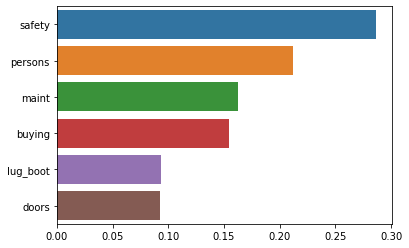

In [22]:
sns.barplot(x=feature_score, y=feature_score.index)

- 중요하지 않은 변수를 제거하고 진행해 보자!

In [23]:
X = df.drop(["class", "doors"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [24]:
rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.9403


In [25]:
rfc4 = RandomForestClassifier(n_estimators=500, random_state=1)
rfc4.fit(X_train, y_train)
y_pred4 = rfc4.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred4)))

모델 정확도 0.9364


- 피처 중요도가 높게 나타난 것을 제외하면...

In [26]:
X = df.drop(["class", "safety"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [27]:
rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.6069


- 모델링의 가장 큰 영향을 주는 것들은...
- 변수 데이터 전처리를 통해 어떤 변수를 사용할 것인가?
- 모델링을 하기 전에 데이터 분석가들이 대부분 데이터 전처리 시간에 많은 시간을 쓰는 이유도...
- 아마존, 구글 등등 자기들의 모델링 -> 모델링 버전을 실제로 사용해서 알고리즘을 사용하는데
- 대부분 많은 변수를 사용하는 것보다는 확실한 변수들을 설정해 두고 모델링을 진행한다.
- 추천, 예측 알고리즘을 사용한다면 -> 확실한 변수들 : 고객의 유저 인터액션에 대한 데이터, 로그 데이터 등 확실한 정보들만 정확히 사용해서 진행한다.

In [28]:
X = df.drop(["class", "doors"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.9403


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100   2   8   1]
 [  2  19   0   1]
 [ 12   0 356   0]
 [  2   3   0  13]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.86      0.90      0.88       111
        good       0.79      0.86      0.83        22
       unacc       0.98      0.97      0.97       368
       vgood       0.87      0.72      0.79        18

    accuracy                           0.94       519
   macro avg       0.87      0.86      0.87       519
weighted avg       0.94      0.94      0.94       519



In [31]:
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

- 다중분류로 진행되어서 값들이 너무 희소하진 않고 어느정도 이진분류의 형태로 하나에 극단적으로 나와있는 건 아니다.
- 이진분류 등에서 예측할 때 클래스의 불균형이 있다면, 이 부분도 정말 고민해야 한다.
- 사기 탐지의 경우나, 이상치 탐치 (제조 공장 데이터 -> 이상치가 대부분 많은 것은 아니다)
- 정상이 대부분이고 비정상이 소수일텐데
- 비정상을 예측하는 것이라면 클래스의 불균형이 있을 것

In [32]:
y_test

1233    unacc
592       acc
625     unacc
1546    unacc
730     unacc
        ...  
1443    unacc
490     unacc
1032    unacc
491     unacc
422       acc
Name: class, Length: 519, dtype: object

In [33]:
c = []
for i in list(y_test):
    a = 0
    if i == "good":
        a = 1
    c.append(a)

In [34]:
sum(c)

22

In [35]:
c = []
for i in list(y_pred):
    a = 0
    if i == "good":
        a = 1
    c.append(a)

In [36]:
sum(c)

24

In [37]:
c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


- 하이퍼파라미터 튜닝을 진행해 보자!
- 궁극적으로 모델링을 진행하면서 평가 지표를 올려야 하는데...
- 그럼 과연 하이퍼파라미터는 얼마나 높여주는가?

In [38]:
X = df.drop(["class", "safety"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.6069


In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [8, 16, 24], 
    "min_samples_leaf": [1, 5, 12]
}

rf_clf = RandomForestClassifier(random_state=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print("{0:.4f}".format(grid_cv.best_score_))

{'max_depth': 16, 'min_samples_leaf': 12}
0.6923


- 중요한 변수 제거
- 0.6069
- 하이퍼파라미터 튜닝 시 0.6923 정도까지 올라간다.

In [40]:
# test 값으로 평가하자
rf_clf_cv = RandomForestClassifier(max_depth=16, min_samples_leaf=12, random_state=1)
rf_clf_cv.fit(X_train, y_train)
pred = rf_clf_cv.predict(X_test)
print("{0:.4f}".format(accuracy_score(y_test, pred)))

0.6898


- 그리드 서치 후 결과
- train 0.6923
- test의 결과는 0.6898

---
- 예시로
- train 0.6923
- test의 결과는 0.5462
- 어떻게 바라봐야 하나? 개선점이 필요하다.

---
- train 0.6923
- test의 결과는 0.7233
- 어떻게 바라봐야 하나?

---
- 과소적합의 개념을 이해하고 모델링을 진행해야지
- 일반화할 때 우리가 설명을 할 수 있다.

In [41]:
X = df.drop(["class", "doors"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

rfc = RandomForestClassifier(random_state=1) # 100 디폴트 값
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("모델 정확도 {0:0.4f}".format(accuracy_score(y_test, y_pred)))

모델 정확도 0.9403


In [42]:
params = {
    "max_depth": [8, 16, 24], 
    "min_samples_leaf": [1, 5, 12]
}

rf_clf = RandomForestClassifier(random_state=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print("{0:.4f}".format(grid_cv.best_score_))

{'max_depth': 16, 'min_samples_leaf': 1}
0.9140


In [43]:
# test 값으로 평가하자
rf_clf_cv = RandomForestClassifier(max_depth=16, min_samples_leaf=1, random_state=1)
rf_clf_cv.fit(X_train, y_train)
pred = rf_clf_cv.predict(X_test)
print("{0:.4f}".format(accuracy_score(y_test, pred)))

0.9403


- 중요하지 않은 변수 제거
- 0.9403
- 하이퍼파라미터 튜닝 시 0.9140 정도까지 떨어진다.
- 이 부분도 값이 다르기 때문에 과적합이 되었는지 판단하는 기준으로 체크해야 한다.

- 프로젝트 진행 시 바라는 점
- 다양한 경우의 수를 만들어서 값들에 대한 비교와
- 수치를 올리기 위한 것들을 진행하면 좋다.

### 필수과제 1
- 수업시간에 제공한 데이터를 가지고
- DT나 다른 알고리즘으로 진행했을 때 어떤 결과가 나오는지?
- 수치만 적는 게 아니라 꼭 모델링별로 설명도 부탁드립니다.